In [28]:
import pandas as pd
#Importação das bases de dados da web
url_ocorrencias = 'https://dedalo.sti.fab.mil.br/dadosabertos/ocorrencia.csv'
url_tipo_ocorrencia = 'https://dedalo.sti.fab.mil.br/dadosabertos/ocorrencia_tipo.csv'
url_aeronaves = 'https://dedalo.sti.fab.mil.br/dadosabertos/aeronave.csv'
url_fator_contribuinte = 'https://dedalo.sti.fab.mil.br/dadosabertos/fator_contribuinte.csv'

#leitura das bases de dados 
ocorrencias_df = pd.read_csv(url_ocorrencias,sep= ';', encoding='latin-1')
tipo_df = pd.read_csv(url_tipo_ocorrencia, sep=';', encoding='latin-1')
aeronaves_df = pd.read_csv(url_aeronaves, sep= ';', encoding='latin-1')
fator_df = pd.read_csv(url_fator_contribuinte, sep=';', encoding='latin-1')

display(ocorrencias_df)

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,87125,87125,87125,87125,87125,INCIDENTE,-7.219166666666,-39.26944444444,JUAZEIRO DO NORTE,CE,...,11/05/2025,04:20:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
1,87124,87124,87124,87124,87124,INCIDENTE,-18.88361111111,-48.22527777777,UBERLÂNDIA,MG,...,08/05/2025,14:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
2,87123,87123,87123,87123,87123,INCIDENTE,-23.43555555555,-46.47305555555,GUARULHOS,SP,...,09/05/2025,18:45:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
3,87122,87122,87122,87122,87122,INCIDENTE,-29.71083333333,-53.69222222222,SANTA MARIA,RS,...,04/05/2025,14:45:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
4,87121,87121,87121,87121,87121,INCIDENTE,-20.81722222222,-49.40694444444,SÃO JOSÉ DO RIO PRETO,SP,...,10/05/2025,10:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13180,28377,28377,28377,28377,28377,ACIDENTE,***,***,IMPERATRIZ,MA,...,27/01/2007,11:18:00,SIM,FINALIZADA,A-053/CENIPA/2009,SIM,2009-11-16,2,1,NÃO
13181,28375,28375,28375,28375,28375,ACIDENTE,-23.6122222222,-51.385,APUCARANA,PR,...,26/01/2007,18:15:00,SIM,FINALIZADA,A-021/CENIPA/2010,SIM,2007-08-15,1,1,NÃO
13182,28355,28355,28355,28355,28355,ACIDENTE,-17.2541666667,-43.8536111111,BOCAIÚVA,MG,...,18/01/2007,09:10:00,SIM,FINALIZADA,A-001/CENIPA/2010,SIM,2010-03-19,11,1,NÃO
13183,28335,28335,28335,28335,28335,ACIDENTE,-23.3444444444,-51.0633333333,LONDRINA,PR,...,19/01/2007,12:30:00,SIM,FINALIZADA,A-169/CENIPA/2013,SIM,2013-12-16,1,1,NÃO


## Tarefa 1: Análise Temporal e Geográfica

### 1. Mês mais perigoso: Calcule e plote um gráfico de barras que mostre o total de ocorrências por mês do ano. Identifique o mês com o maior número de ocorrências.

Locale definido para 'Portuguese_Brazil'.
O mês com maior número de acidentes é: janeiro


(<Axes: title={'center': 'Ocorrencia de acidentes por mês'}, xlabel='Meses', ylabel='Quantidade'>,
 None)

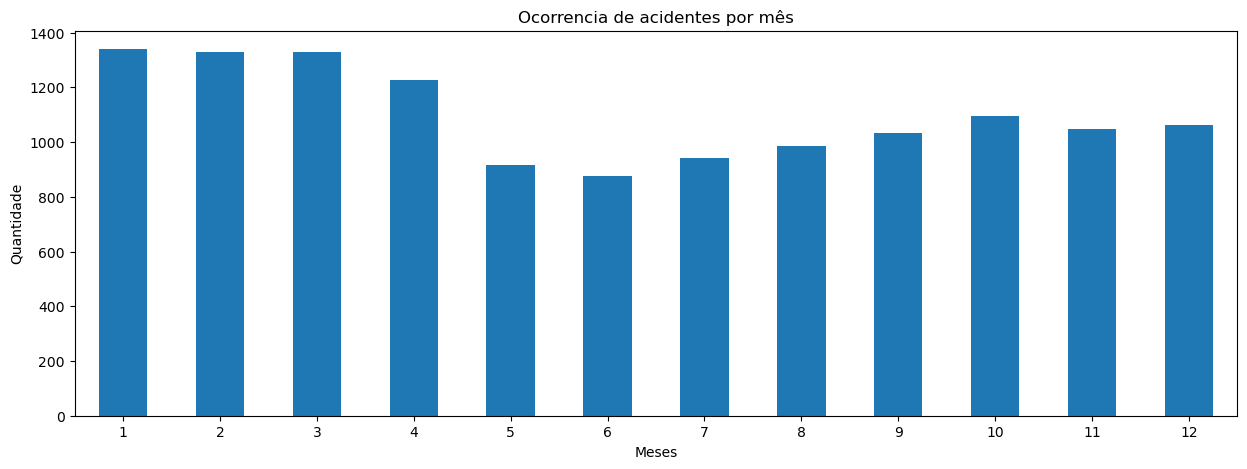

In [29]:
import locale
try:
    locale.setlocale(locale.LC_TIME, 'Portuguese_Brazil')
    print("Locale definido para 'Portuguese_Brazil'.")
except locale.Error:
    print("Locale 'Portuguese_Brazil' não encontrado. Tentando 'pt_BR.utf8'...")
ocorrencias_df['ocorrencia_dia'] = pd.to_datetime(ocorrencias_df['ocorrencia_dia'],format = '%d/%m/%Y')
from datetime import date
def mes_mais_perigoso(df):
    combinado_df = df[['ocorrencia_dia']]
    combinado_df = combinado_df.groupby(combinado_df['ocorrencia_dia'].dt.month)['ocorrencia_dia'].count()
    mes = combinado_df.idxmax()
    nome_mes = date(2000,mes,1)
    mes_portugues = nome_mes.strftime('%B')
    return combinado_df.plot(figsize=[15,5], kind='bar', title='Ocorrencia de acidentes por mês', xlabel='Meses', ylabel='Quantidade', rot=0), print(f'O mês com maior número de acidentes é: {mes_portugues}')


mes_mais_perigoso(ocorrencias_df)

### 2. Top 5 estados: Liste os 5 estados brasileiros com o maior número de ocorrências registradas.

ocorrencia_uf
SP    3283
RJ    1277
MG    1077
PR     917
RS     733
Name: count, dtype: int64

(<Axes: xlabel='Estados', ylabel='Quantidade de acidentes'>, None)

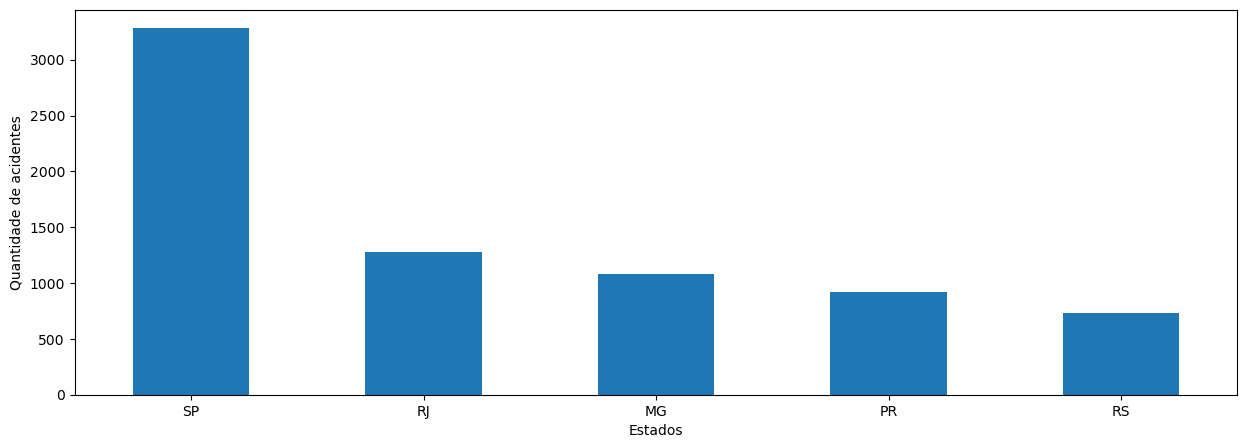

In [30]:
def top_5(df):
    combinado_df = df['ocorrencia_uf'].value_counts()
    return combinado_df[:5].plot(figsize=[15, 5], kind='bar', rot=0, xlabel= 'Estados', ylabel='Quantidade de acidentes'), display(combinado_df[:5])

top_5(ocorrencias_df)

### 3. Tendência anual: Plote um gráfico de linhas mostrando a evolução do número total de ocorrências ao longo dos anos.

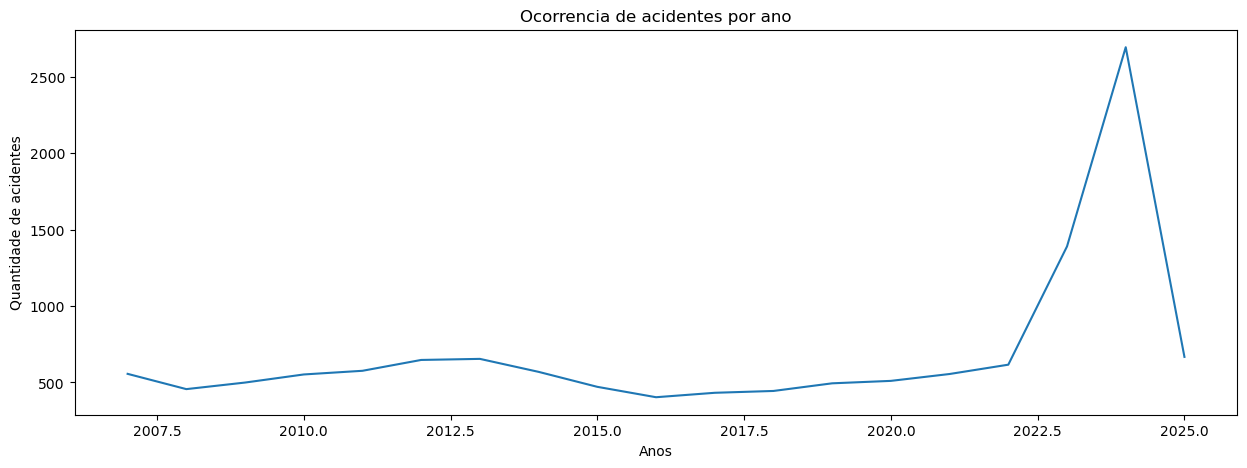

In [31]:
def evolucao_ocorrencias_ano(df):
    combinado_df = df.groupby(df['ocorrencia_dia'].dt.year)['ocorrencia_dia'].count()
    combinado_df.plot(figsize=[15, 5], rot=0, xlabel='Anos', ylabel='Quantidade de acidentes', title='Ocorrencia de acidentes por ano')

evolucao_ocorrencias_ano(ocorrencias_df)    

## Tarefa 2: Análise da Ocorrência e Aeronave

### 1. Tipos de aeronave: Qual o tipo de veículo (aeronave_tipo_veiculo) mais envolvido em ocorrências classificadas como ACIDENTE? (Dica: Você precisará juntar as bases de dados de ocorrência e aeronave).

aeronave_tipo_veiculo
AVIÃO          2115
HELICÓPTERO     351
ULTRALEVE       291
***              58
PLANADOR         21
ANFÍBIO           8
TRIKE             5
GIROCÓPTERO       4
DIRIGÍVEL         1
DRONE             1
HIDROAVIÃO        1
BALÃO             1
Name: count, dtype: int64

(<Axes: title={'center': 'Tipos de aeronaves envolvidas em ACIDENTES'}, xlabel='Tiupos de aeronaves', ylabel='Quantidade de acidentes'>,
 None)

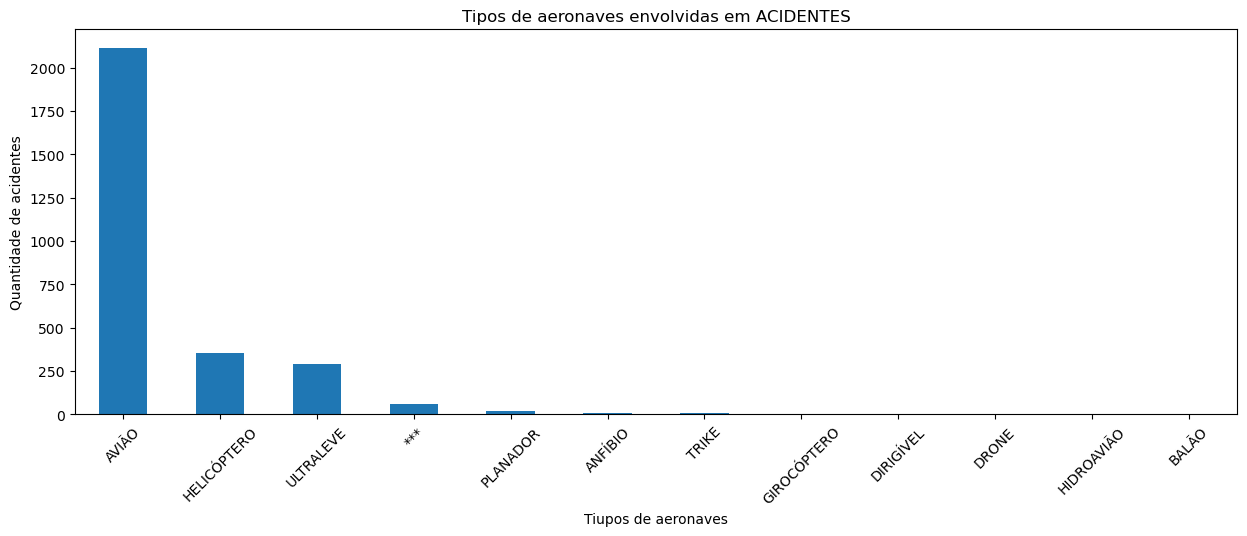

In [32]:
def aeronaves_acidentes():
    combinado_df = ocorrencias_df.merge(aeronaves_df, on='codigo_ocorrencia2')
    combinado_df = combinado_df[['ocorrencia_classificacao', 'aeronave_tipo_veiculo']]
    combinado_df = combinado_df[combinado_df['ocorrencia_classificacao'] == 'ACIDENTE']
    combinado_df = combinado_df['aeronave_tipo_veiculo'].value_counts()
    return combinado_df.plot(figsize=[15, 5],kind='bar', title='Tipos de aeronaves envolvidas em ACIDENTES', xlabel='Tiupos de aeronaves', ylabel='Quantidade de acidentes', rot=45), display(combinado_df)

aeronaves_acidentes()

### 2. Fase da operação: Calcule a contagem de ocorrências por fase da operação (aeronave_fase_operacao) e identifique as três fases mais comuns.

<Axes: title={'center': 'Acidentes mais comuns por fase de operação'}, xlabel='Número de acidentes', ylabel='Fase de operação'>

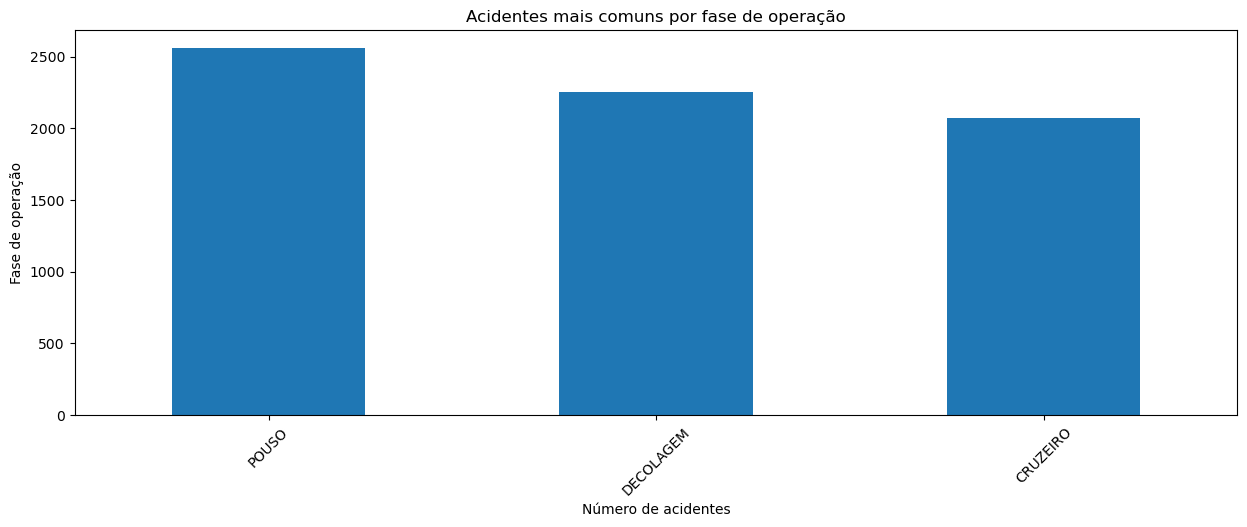

In [33]:
def acdt_por_fase_operacao():
    combinado_df = aeronaves_df['aeronave_fase_operacao'].value_counts()

    return combinado_df[:3].plot(figsize=[15,5], kind='bar', title='Acidentes mais comuns por fase de operação', xlabel='Número de acidentes', ylabel='Fase de operação', rot=45)

acdt_por_fase_operacao()

### 3. Ocorrências fatais: Liste o número total de fatalidades por ano.

ocorrencia_dia
2007    270.0
2008     58.0
2009     63.0
2010     55.0
2011    110.0
2012    110.0
2013     94.0
2014     83.0
2015     79.0
2016    104.0
2017     54.0
2018     81.0
2019     66.0
2020     55.0
2021     60.0
2022     49.0
2023     77.0
2024    152.0
2025     25.0
Name: aeronave_fatalidades_total, dtype: float64

(<Axes: title={'center': 'Fatalidades por ano'}, xlabel='Anos', ylabel='Quantidade de fatalidades'>,
 None)

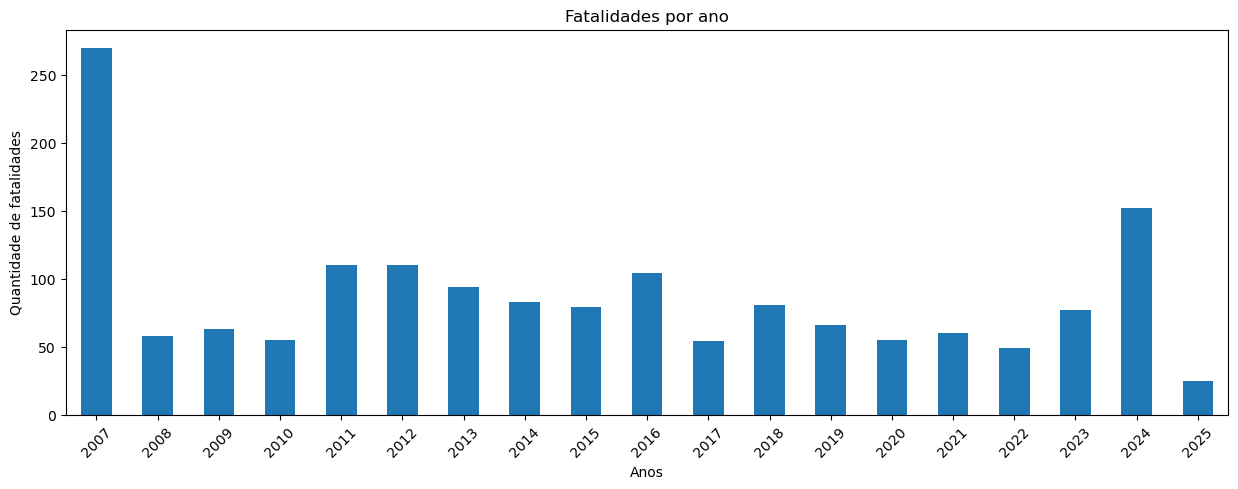

In [34]:
def fatalidades_por_ano():
    combinado_df = ocorrencias_df.merge(aeronaves_df, on ='codigo_ocorrencia2', how='left')
    combinado_df = combinado_df[['aeronave_fatalidades_total', 'ocorrencia_dia']]
    combinado_df = combinado_df.groupby(combinado_df['ocorrencia_dia'].dt.year)['aeronave_fatalidades_total'].sum()
    return combinado_df.plot(figsize=[15, 5], kind='bar', title='Fatalidades por ano', xlabel='Anos', ylabel='Quantidade de fatalidades', rot=45), display(combinado_df)

fatalidades_por_ano()

## Tarefa 3: Análise de Fatores Contribuintes

### 1. Fator principal: Qual o fator contribuinte mais frequente (fator_nome) que foi associado a ocorrências de ACIDENTE?

fator_nome                 
JULGAMENTO DE PILOTAGEM        1112
APLICAÇÃO DE COMANDOS           786
SUPERVISÃO GERENCIAL            649
PLANEJAMENTO DE VOO             615
MANUTENÇÃO DA AERONAVE          516
ATITUDE                         483
PROCESSO DECISÓRIO              461
POUCA EXPERIÊNCIA DO PILOTO     344
PERCEPÇÃO                       310
INSTRUÇÃO                       245
Name: count, dtype: int64

(<Axes: title={'center': 'Fatores contribuinte mais frequentes'}, xlabel='Fatores', ylabel='Quantidade de ocorrências'>,
 None)

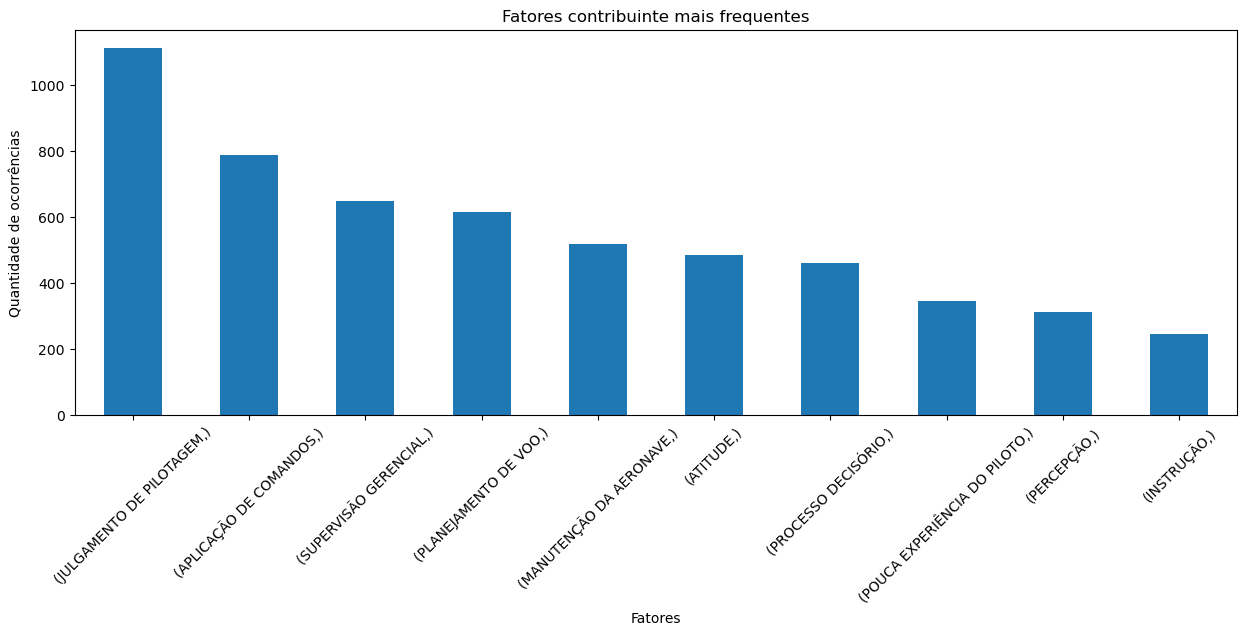

In [35]:
def fator_principal(df):
    combinado_df = df[['fator_nome']].value_counts()
    return combinado_df[:10].plot(figsize=[15, 5], kind='bar', title='Fatores contribuinte mais frequentes', xlabel='Fatores', ylabel='Quantidade de ocorrências', rot=45), display(combinado_df[:10])

fator_principal(fator_df)   

### 2. Fatores por tipo de aeronave: Crie um gráfico de barras com os 10 fatores contribuintes mais comuns para aeronaves de tipo HELICÓPTERO.

<Axes: title={'center': 'Fatores mais comuns para acidentes com helicopteros'}, xlabel='Fatores', ylabel='Quantidade de acidentes'>

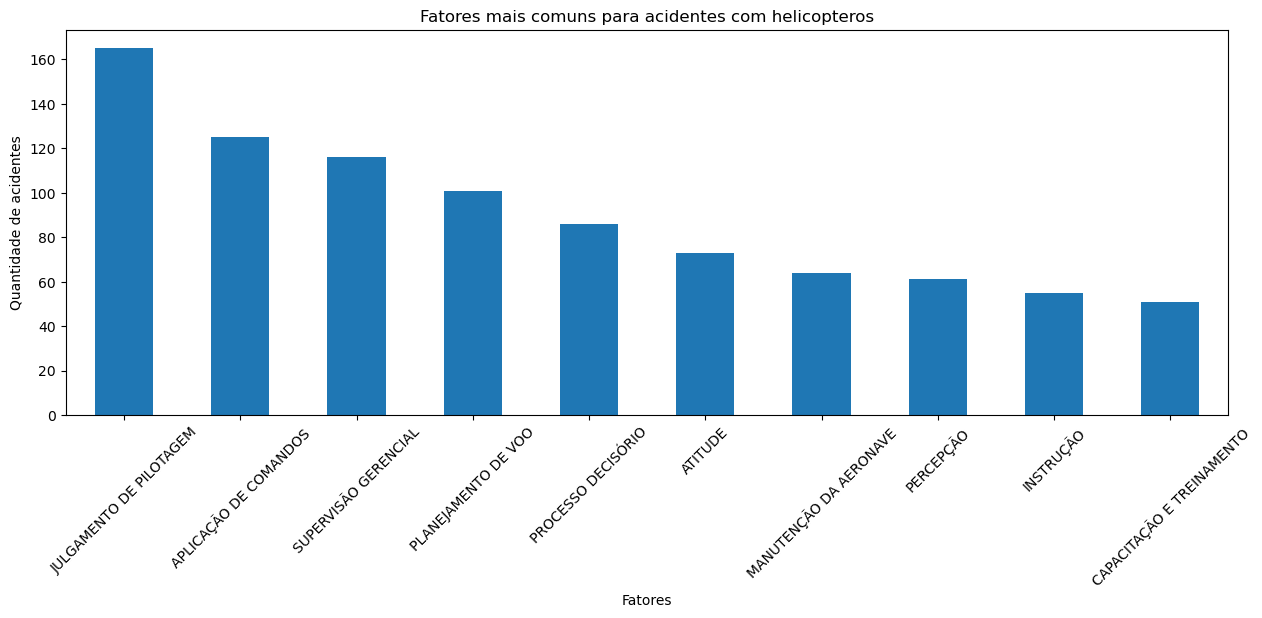

In [62]:
def fatores_acidentes_helicopteros():
    combinado_df = pd.merge(ocorrencias_df, fator_df, on='codigo_ocorrencia3', how='inner')
    combinado_df = pd.merge(combinado_df, aeronaves_df, on='codigo_ocorrencia2', how='right')
    combinado_df = combinado_df[['fator_nome','aeronave_tipo_veiculo']]
    combinado_df = combinado_df[combinado_df['aeronave_tipo_veiculo'] == 'HELICÓPTERO']
    return combinado_df['fator_nome'].value_counts()[:10].plot(figsize=[15,5], kind='bar', rot=45, title='Fatores mais comuns para acidentes com helicopteros', xlabel='Fatores', ylabel='Quantidade de acidentes')


fatores_acidentes_helicopteros()

### 3. Fatalidades por fator: Analise os fatores contribuintes associados às ocorrências que tiveram fatalidades.

<Axes: title={'center': 'Fatalidades por fator'}, xlabel='Fatores', ylabel='Quantidade de acidentes'>

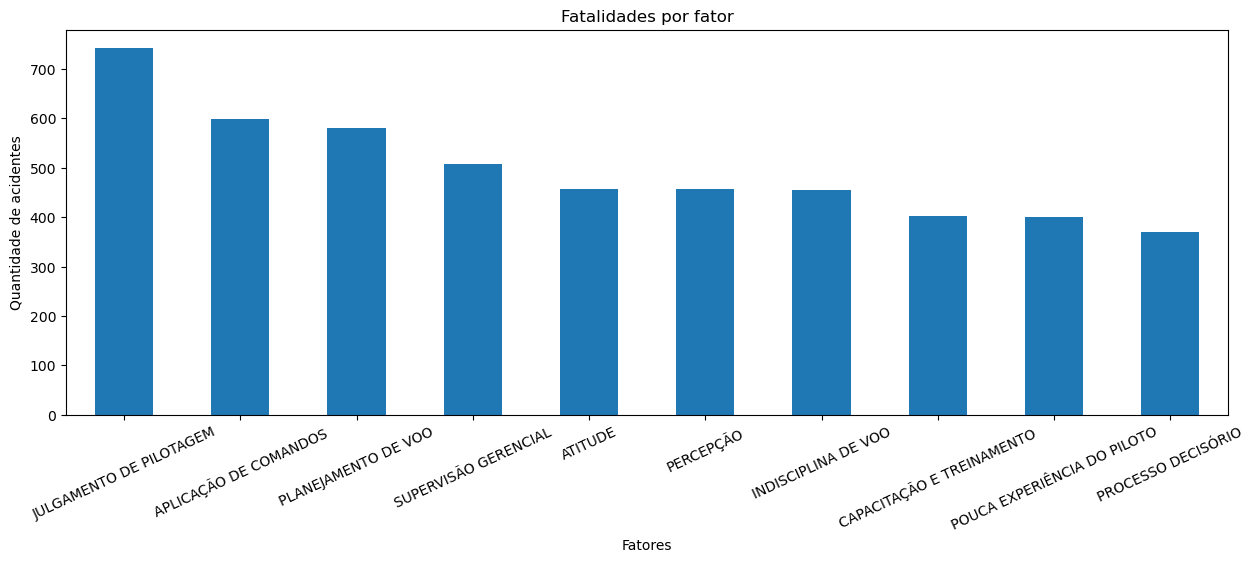

In [84]:
def fatalidades_por_fator():
    combinado_df = pd.merge(ocorrencias_df, aeronaves_df, on='codigo_ocorrencia2', how='inner')
    combinado_df = pd.merge(combinado_df, fator_df, on='codigo_ocorrencia3', how='inner')
    combinado_df = combinado_df[['fator_nome', 'aeronave_fatalidades_total']]
    combinado_df = combinado_df.groupby(combinado_df['fator_nome'])['aeronave_fatalidades_total'].sum()
    combinado_df = combinado_df.sort_values(ascending=False)
    return combinado_df[:10].plot(figsize=[15,5], rot=25, title='Fatalidades por fator',xlabel='Fatores', ylabel='Quantidade de acidentes', kind='bar')

fatalidades_por_fator()